In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# The Embedding layer takes at least two arguments:
# the number of possible words in the vocabulary
# the dimensionality of the embedding
embedding_layer = layers.Embedding(1000, 32)

In [3]:
embedding_layer

In [4]:
vacab_size = 10000 
imdb = keras.datasets.imdb

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vacab_size)

In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
train_data.shape

(25000,)

In [10]:
len(train_data[0]),len(train_data[1])

(218, 189)

In [15]:
# Convert the integers back to words
word_index = imdb.get_word_index()

In [16]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [17]:
reverse_word_index[1]

'the'

In [19]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [20]:
decode_review(train_data[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [21]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [24]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [26]:
maxlen = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=maxlen)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=maxlen)



In [27]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [29]:
# Create a simple model
embedding_dim = 16 
model = keras.Sequential([
    layers.Embedding(vacab_size, embedding_dim, input_length=maxlen),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])


In [32]:
history = model.fit(
train_data,
train_labels,
epochs=30,
batch_size=512,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
20000/20000 [==============================] - 2s 101us/sample - loss: 0.6926 - acc: 0.5315 - val_loss: 0.6916 - val_acc: 0.4942
Epoch 2/30
20000/20000 [==============================] - 0s 17us/sample - loss: 0.6892 - acc: 0.5645 - val_loss: 0.6861 - val_acc: 0.6912
Epoch 3/30
20000/20000 [==============================] - 0s 17us/sample - loss: 0.6811 - acc: 0.7032 - val_loss: 0.6748 - val_acc: 0.7278
Epoch 4/30
20000/20000 [==============================] - 0s 18us/sample - loss: 0.6654 - acc: 0.7308 - val_loss: 0.6545 - val_acc: 0.7562
Epoch 5/30
20000/20000 [==============================] - 0s 18us/sample - loss: 0.6393 - acc: 0.7624 - val_loss: 0.6239 - val_acc: 0.7628
Epoch 6/30
20000/20000 [==============================] - 0s 18us/sample - loss: 0.6029 - acc: 0.7870 - val_loss: 0.5841 - val_acc: 0.7934
Epoch 7/30
20000/20000 [==============================] - 0s 18us/sa

In [35]:
his_dic= history.history

In [36]:
his_dic.items()

dict_items([('loss', [0.6925666880607605, 0.6892350396156312, 0.6811275929450988, 0.6653603342056275, 0.6393422235488891, 0.6029187465667725, 0.5580526273727417, 0.5083273460865021, 0.4611535402297974, 0.41865144720077513, 0.3829911268234253, 0.35387414379119875, 0.329432044839859, 0.3088108956336975, 0.29256373481750486, 0.2766929392814636, 0.2632266904830933, 0.25047496478557585, 0.23960011286735536, 0.22957043948173522, 0.22122593522071837, 0.21461875309944153, 0.20614261617660523, 0.1987708675146103, 0.1918449288368225, 0.18648475559949876, 0.18070422739982606, 0.17514012260437012, 0.1694123791217804, 0.1645164566040039]), ('acc', [0.53155, 0.5645, 0.70325, 0.73075, 0.76245, 0.787, 0.81065, 0.84035, 0.8561, 0.86975, 0.87765, 0.8847, 0.891, 0.89735, 0.9017, 0.9049, 0.9096, 0.91405, 0.91745, 0.9201, 0.9223, 0.9256, 0.92865, 0.9313, 0.93265, 0.93475, 0.93775, 0.9394, 0.94345, 0.94425]), ('val_loss', [0.6916154224395752, 0.6861252544403076, 0.6748137985229492, 0.6545472714424133, 0.623

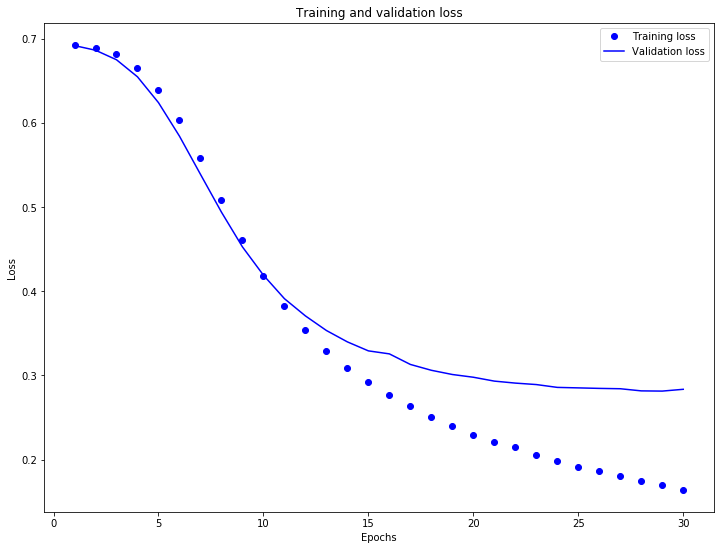

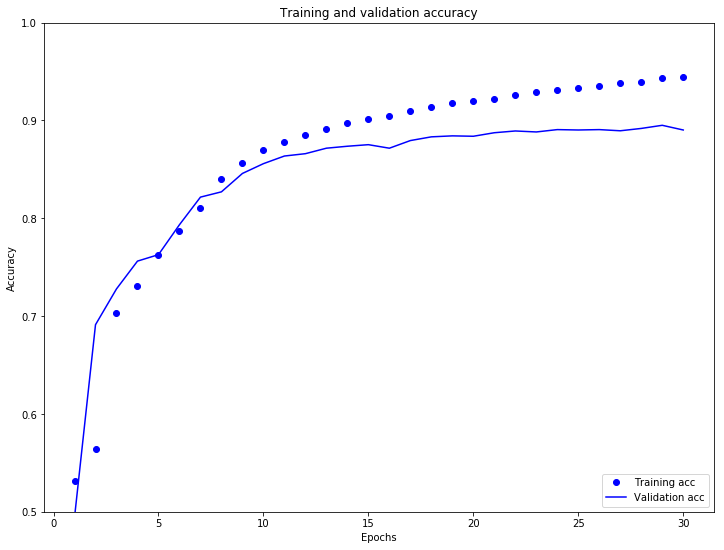

In [37]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [41]:
# Retrieve the learned embeddings
# Let's retrieve the word embeddings learned during trainning
# This will be a matrix of shape (vocab_size, embedding_dim)

e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


We will now write the weights to disk. To use the Embedding Projector, we will upload two files in tab seperated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).

In [43]:
import io 

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(vacab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()